# Credit Risk Classification Project
## Overview
This project aims to develop a machine learning model that predicts whether a loan applicant is likely to default on their loan. By accurately classifying applicants into high-risk and low-risk categories, financial institutions can make more informed lending decisions, ultimately reducing the risk of loan defaults.

## Business Problem Statement
Loan defaults can lead to significant financial losses for lending institutions. The goal of this project is to build a predictive model that can classify loan applicants based on their likelihood of defaulting on a loan, using a dataset of applicant information and loan details.

## Objectives
### Main Objective
1. To build a predictive model that accurately classifies loan applicants into high-risk and low-risk categories.
### Specific Objectives
1. To identify and understand key features that influence loan default. i.e:

- Analyze the impact of age on loan default rates.
- Determine the income brackets most likely to default on loans.
- Investigate the effect of employment length on loan default.
- Identify the loan amounts that are most frequently defaulted.
- Assess how interest rates influence loan default likelihood.
- Evaluate the relationship between credit history length and loan default.
- Explore the influence of home ownership status on loan default.
- Examine which loan intents are most associated with defaults.



## Steps
 - Data Exploration,Cleaning & preprocessing: Understand the dataset, handle missing values, and prepare the data for modeling.
 - Exploratory Data Analysis (EDA): Perform univariate analysis, Bivariate analysis and Mutlivariate analysis on features.
 - Feature Engineering: Create meaningful features that improve the model’s predictive performance.
 - Model Training & Evaluation: Train multiple classification models, optimize them, and evaluate their performance using relevant metrics.
 - Model Interpretation: Identify the most important features contributing to the model's predictions and interpret the results.
 - Documentation & Presentation: Document the entire process and present the findings in a clear, concise manner.


# 1. Data Exploration

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Set up visualizations
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")

# Load the dataset
file_path = 'credit_risk.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


Id  Age  Income      Home  Emp_length     Intent  Amount   Rate  Status  \
0   0   22   59000      RENT       123.0   PERSONAL   35000  16.02       1   
1   1   21    9600       OWN         5.0  EDUCATION    1000  11.14       0   
2   2   25    9600  MORTGAGE         1.0    MEDICAL    5500  12.87       1   
3   3   23   65500      RENT         4.0    MEDICAL   35000  15.23       1   
4   4   24   54400      RENT         8.0    MEDICAL   35000  14.27       1   

   Percent_income Default  Cred_length  
0            0.59       Y            3  
1            0.10       N            2  
2            0.57       N            3  
3            0.53       N            2  
4            0.55       Y            4

In [2]:
# General overview of the dataset
df.shape

(32581, 12)

In [3]:
# Check the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB


In [4]:
# Summary statistics for numerical columns
df.describe()

Id           Age        Income    Emp_length        Amount  \
count  32581.000000  32581.000000  3.258100e+04  31686.000000  32581.000000   
mean   16290.006139     27.734600  6.607485e+04      4.789686   9589.371106   
std     9405.479594      6.348078  6.198312e+04      4.142630   6322.086646   
min        0.000000     20.000000  4.000000e+03      0.000000    500.000000   
25%     8145.000000     23.000000  3.850000e+04      2.000000   5000.000000   
50%    16290.000000     26.000000  5.500000e+04      4.000000   8000.000000   
75%    24435.000000     30.000000  7.920000e+04      7.000000  12200.000000   
max    32780.000000    144.000000  6.000000e+06    123.000000  35000.000000   

               Rate        Status  Percent_income   Cred_length  
count  29465.000000  32581.000000    32581.000000  32581.000000  
mean      11.011695      0.218164        0.170203      5.804211  
std        3.240459      0.413006        0.106782      4.055001  
min        5.420000      0.000000        0.000000      2.000000  
25%        7.900000      0.000000        0.090000      3.000000  
50%       10.990000      0.000000        0.150000      4.000000  
75%       13.470000      0.000000        0.230000      8.000000  
max       23.220000      1.000000        0.830000     30.000000

# 2. Data Cleaning

In [5]:
# Check for missing values
df.isnull().sum()

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64

### 2.1 Handling missing values

In [6]:
# Impute missing values with the median or mean (for numerical columns)
df['Emp_length'] = df['Emp_length'].fillna(df['Emp_length'].median())
df['Rate'] = df['Rate'].fillna(df['Rate'].mean())


In [7]:
# Check if there are any remaining missing values
missing_values = df.isnull().sum()
print("Missing values after imputation:\n", missing_values)

Missing values after imputation:
 Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64


### 2.2 Handling outliers

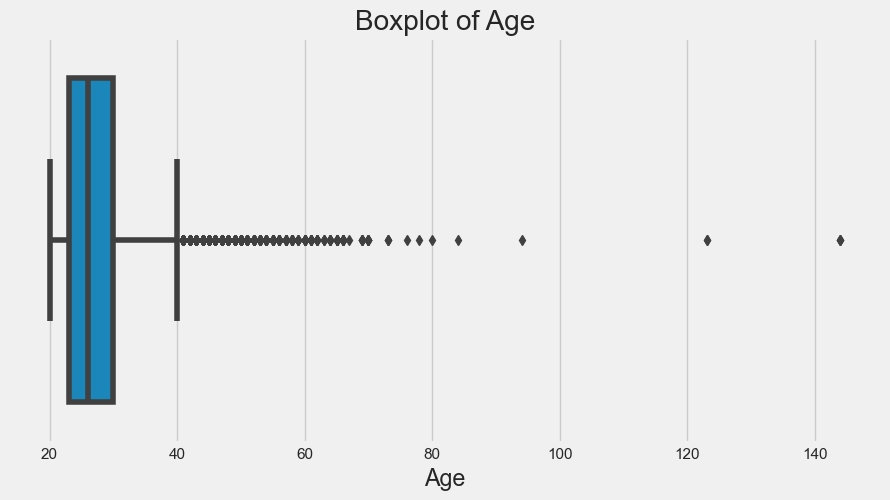

In [8]:
# Boxplot to check for outliers in the 'Age' column
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

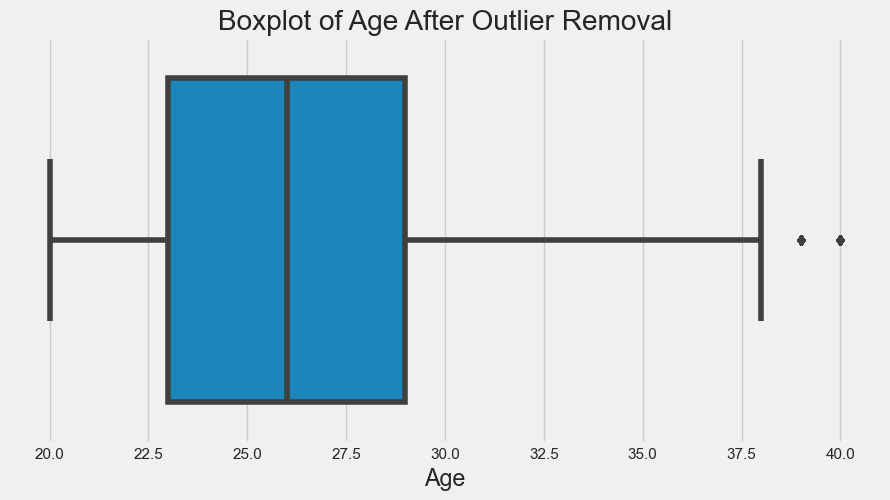

In [9]:
# Calculate IQR for 'Age'
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define a filter to remove outliers
age_outliers = (df['Age'] >= (Q1 - 1.5 * IQR)) & (df['Age'] <= (Q3 + 1.5 * IQR))

# Apply the filter
df = df[age_outliers]

# Verify by plotting again
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age After Outlier Removal')
plt.show()


# 3. Data Preprocessing

## 3.1 Encoding Categorical Variables

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
# Define the categorical columns
categorical_columns = ['Home', 'Intent', 'Default']

# Initialize the OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid multicollinearity

# Apply the encoder to the categorical columns
encoded_features = ohe.fit_transform(df[categorical_columns])

# Convert the encoded features to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(categorical_columns))

# Concatenate the original dataframe (without the original categorical columns) with the encoded features
df = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

# Display the first few rows of the updated DataFrame
print(df.head())

    Id   Age   Income  Emp_length   Amount   Rate  Status  Percent_income  \
0  0.0  22.0  59000.0       123.0  35000.0  16.02     1.0            0.59   
1  1.0  21.0   9600.0         5.0   1000.0  11.14     0.0            0.10   
2  2.0  25.0   9600.0         1.0   5500.0  12.87     1.0            0.57   
3  3.0  23.0  65500.0         4.0  35000.0  15.23     1.0            0.53   
4  4.0  24.0  54400.0         8.0  35000.0  14.27     1.0            0.55   

   Cred_length  Home_OTHER  Home_OWN  Home_RENT  Intent_EDUCATION  \
0          3.0         0.0       0.0        1.0               0.0   
1          2.0         0.0       1.0        0.0               1.0   
2          3.0         0.0       0.0        0.0               0.0   
3          2.0         0.0       0.0        1.0               0.0   
4          4.0         0.0       0.0        1.0               0.0   

   Intent_HOMEIMPROVEMENT  Intent_MEDICAL  Intent_PERSONAL  Intent_VENTURE  \
0                     0.0             0.0   

# 4. Exploratory Data Analysis

## 4.1 Univariate Analysis

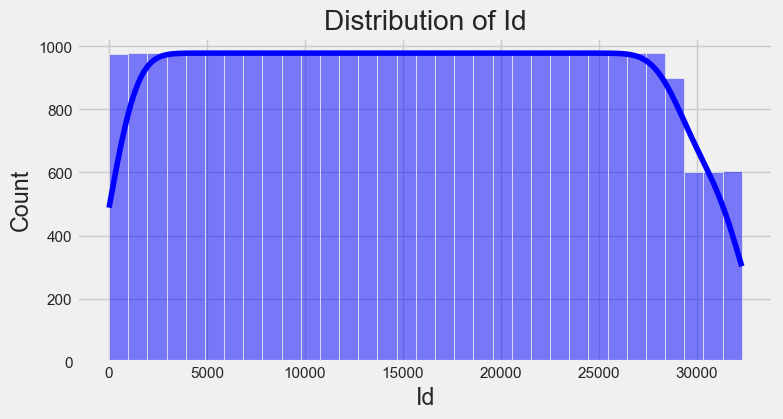

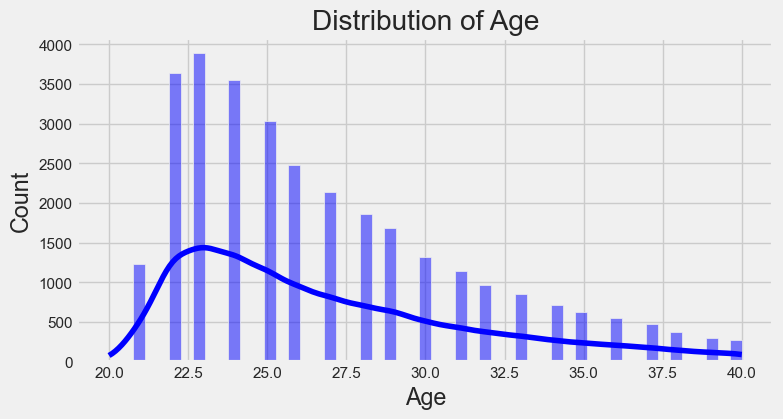

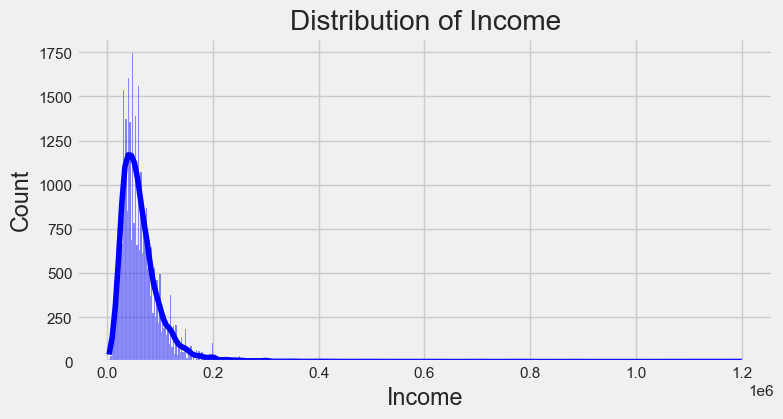

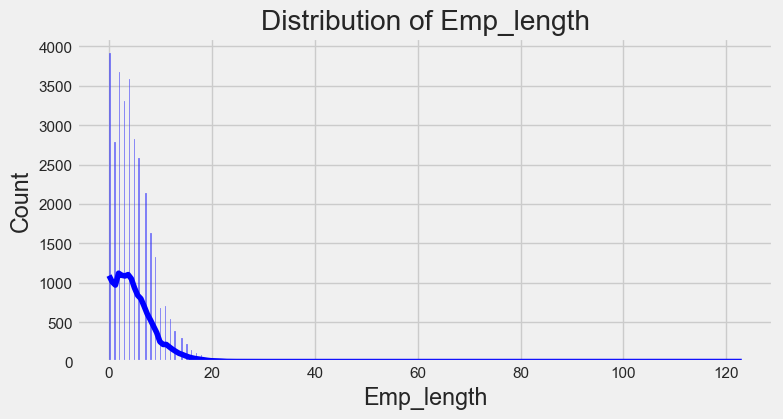

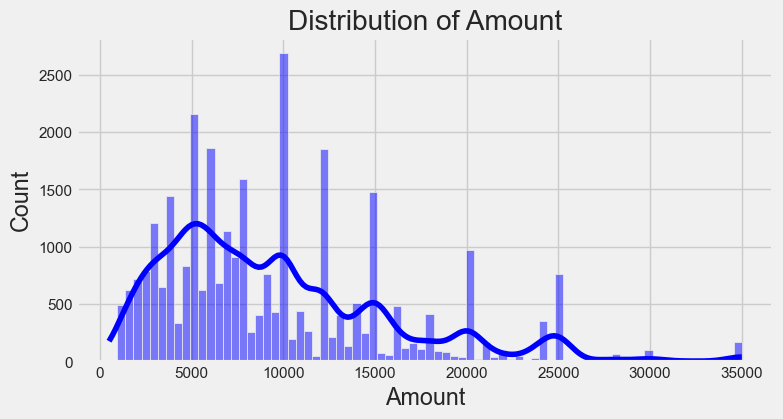

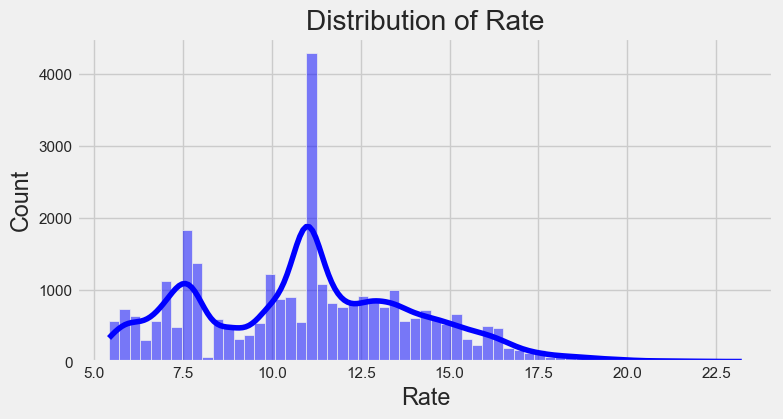

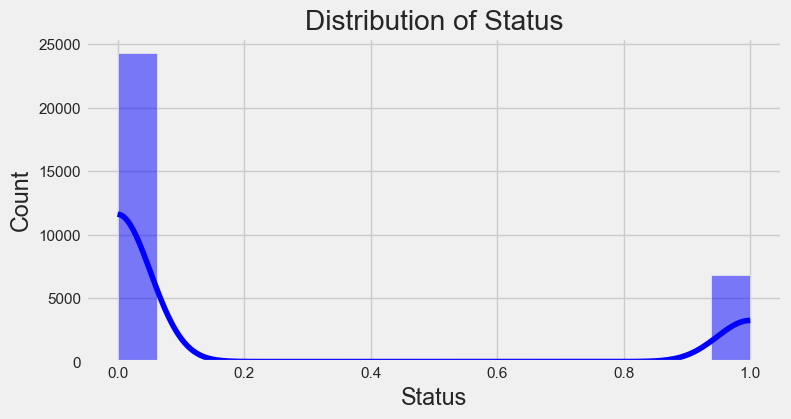

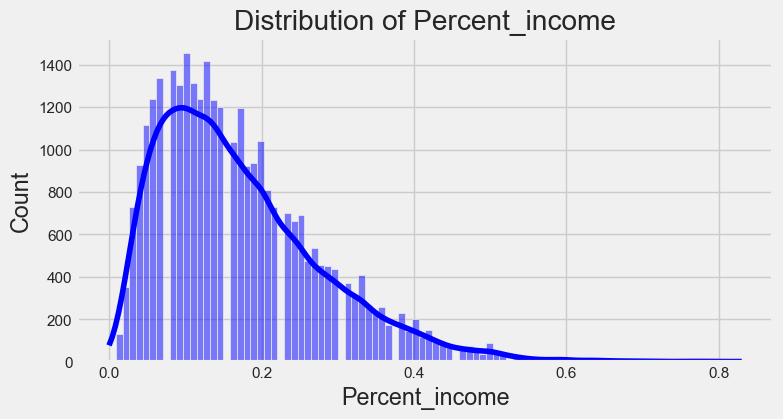

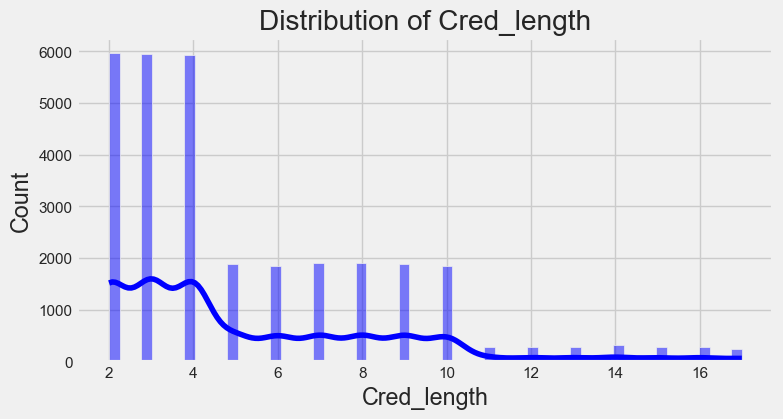

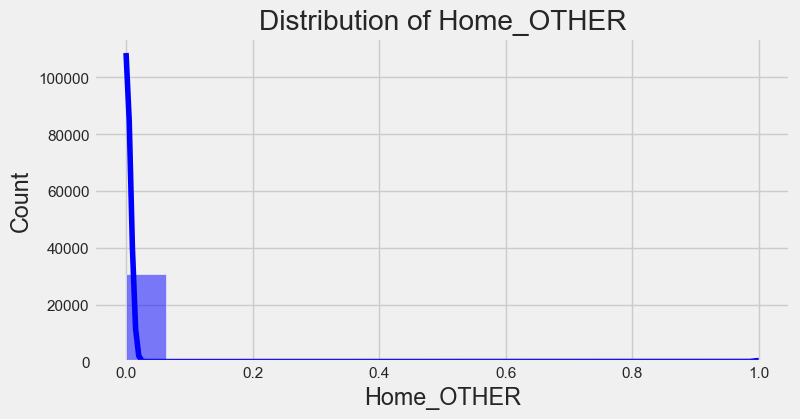

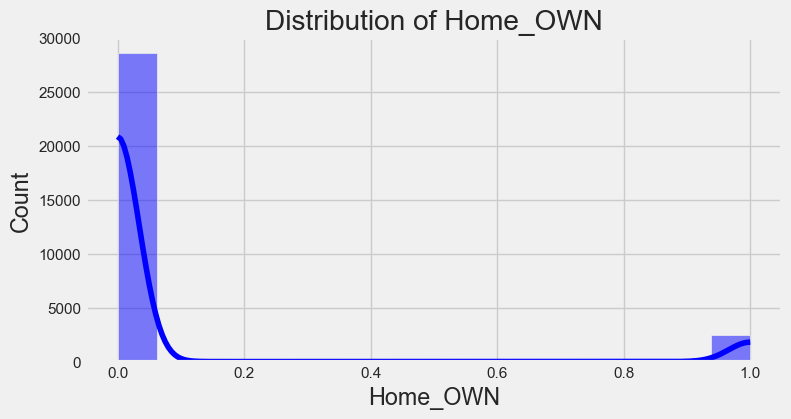

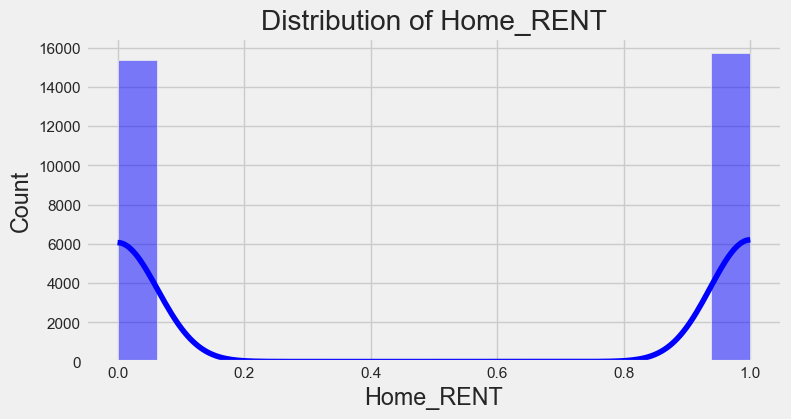

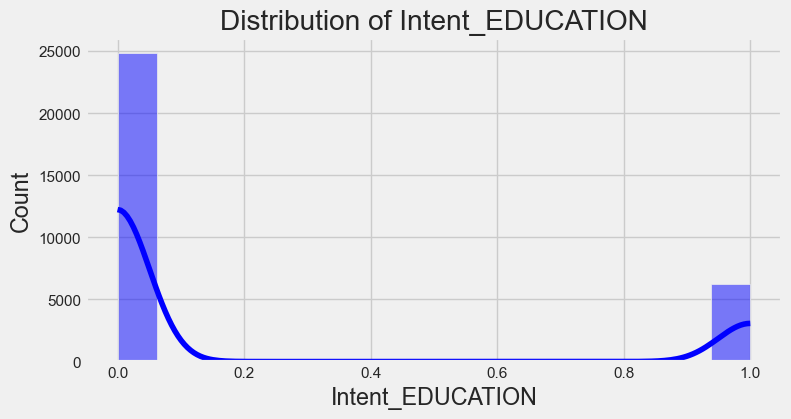

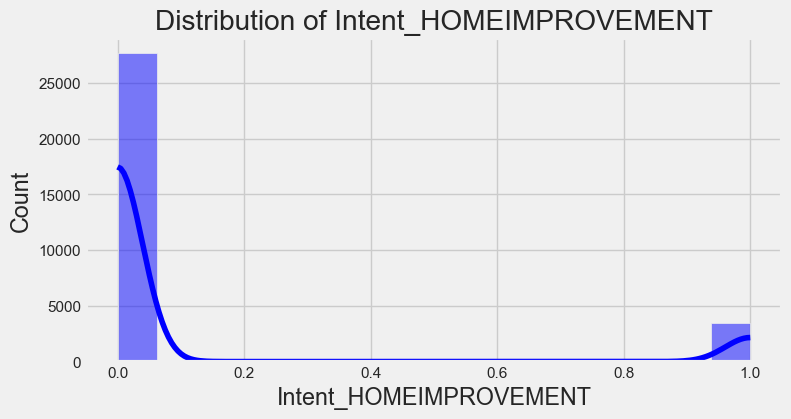

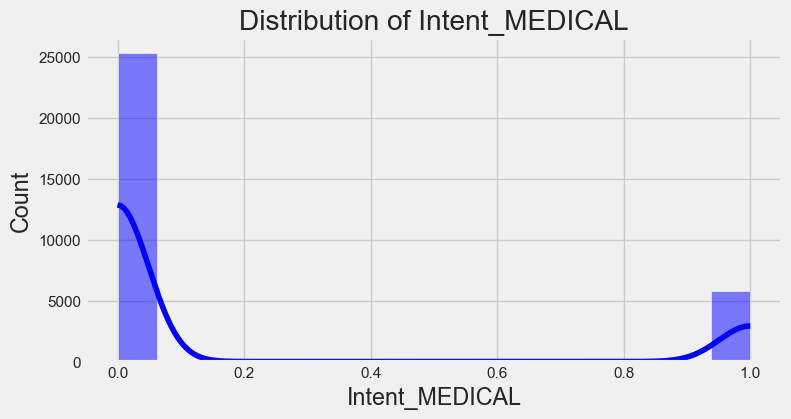

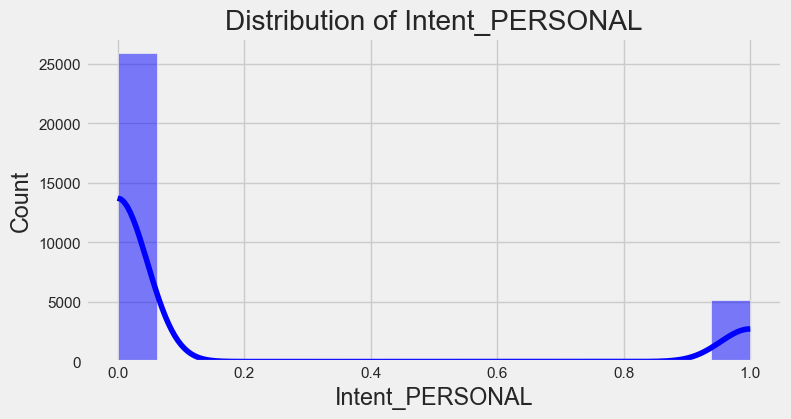

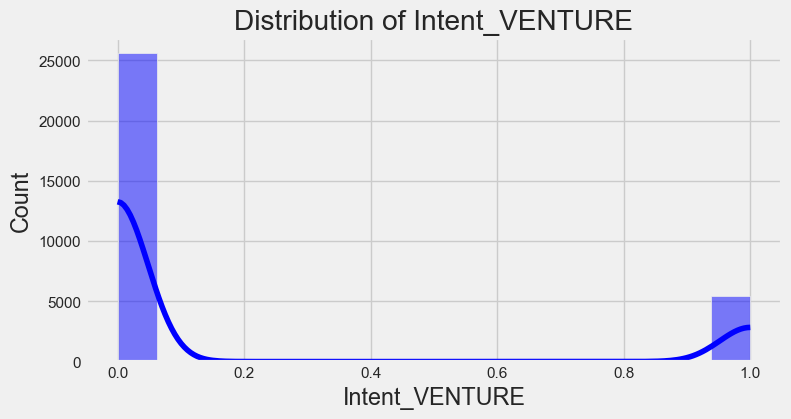

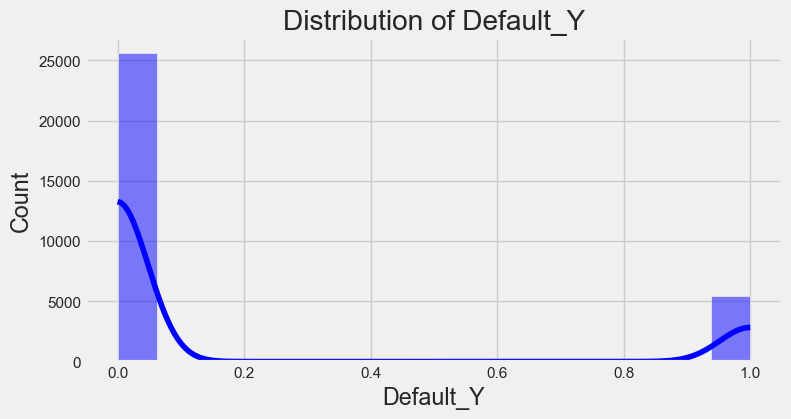

In [12]:
# Univariate Analysis
def univariate_analysis(df):
    # Numerical Columns
    num_columns = df.select_dtypes(include=['int64', 'float64']).columns
    for col in num_columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, color='blue')
        plt.title(f'Distribution of {col}')
        plt.show()

    # Categorical Columns
    cat_columns = df.select_dtypes(include=['object', 'bool']).columns
    for col in cat_columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=df, palette='Set2')
        plt.title(f'Count Plot of {col}')
        plt.show()

# Perform Univariate Analysis
univariate_analysis(df)

##  4.2 Bivariate Analysis

### 1. Age vs. Loan Default

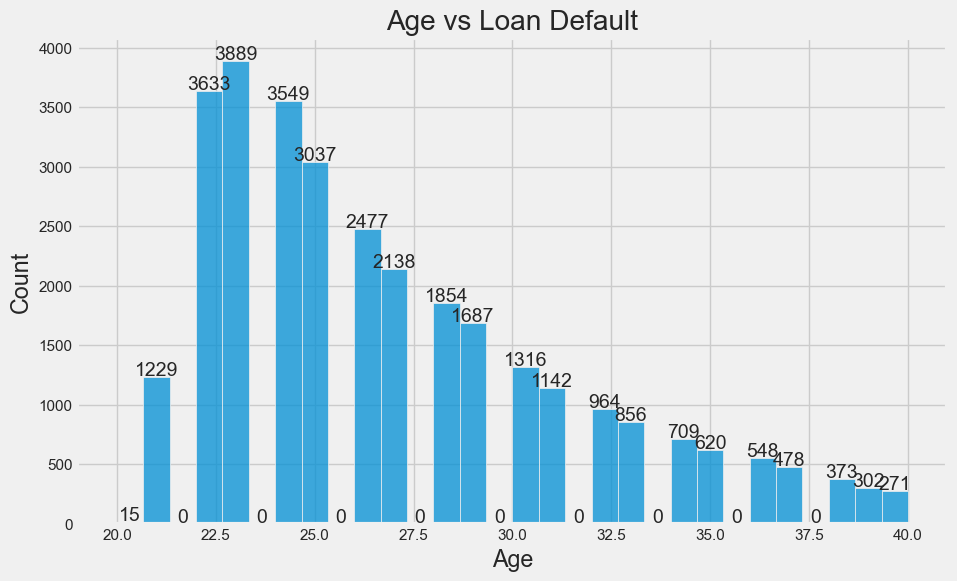

In [13]:
# 1. Age vs. Loan Default
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=df, x='Age', multiple='stack', kde=False, bins=30)
plt.title('Age vs Loan Default')
plt.xlabel('Age')
plt.ylabel('Count')

# Add counts on top of each bar
for patch in ax.patches:
    height = patch.get_height()
    ax.annotate(f'{int(height)}', 
                (patch.get_x() + patch.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

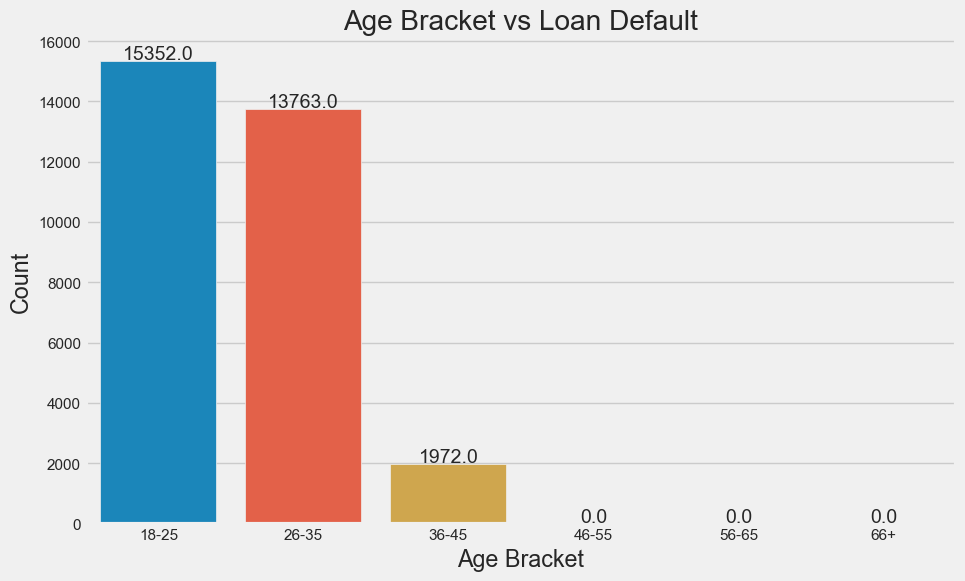

In [14]:
# 1. Age Bracket vs. Loan Default
df['Age_Bracket'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 100], 
                           labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66+'])

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Age_Bracket')

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Add the title and labels
plt.title('Age Bracket vs Loan Default')
plt.xlabel('Age Bracket')
plt.ylabel('Count')

# Show the plot
plt.show()

#### Inference :
- It is seen that **49%** of people who default  on loans are the **young people** majorly aged between **18-25**.


### 2. Income vs. Loan Default

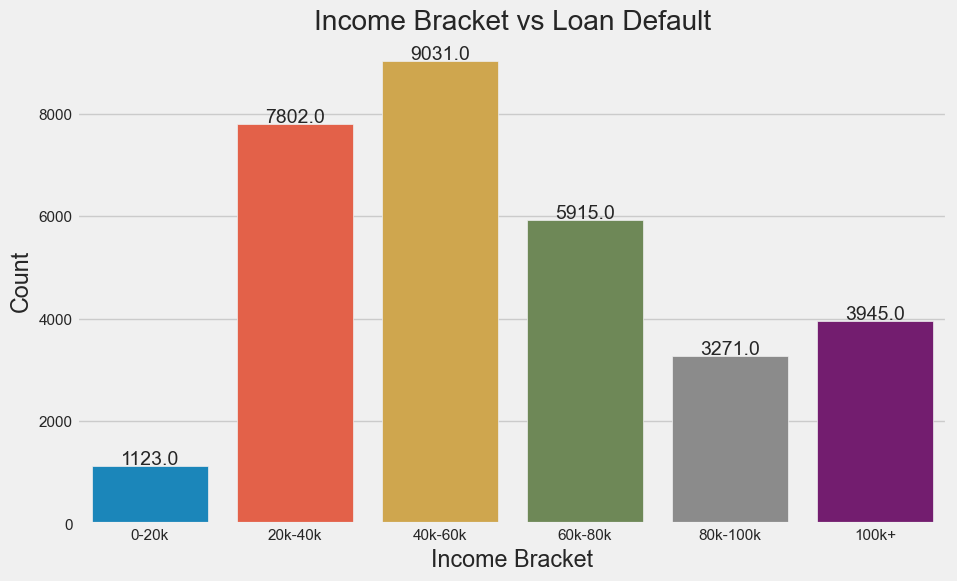

In [15]:
# 2. Income vs. Loan Default
df['Income_Bracket'] = pd.cut(df['Income'], bins=[0, 20000, 40000, 60000, 80000, 100000, np.inf], 
                              labels=['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k+'])
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Income_Bracket')

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Add the title and labels
plt.title('Income Bracket vs Loan Default')
plt.xlabel('Income Bracket')
plt.ylabel('Count')

# Show the plot
plt.show()

#### Inference :
- It is observed that the middle income(**Earning 40k-60k**), are prone to loan default.**(29%)** of the total loan borrowers.

### 3. Employment Length vs. Loan Default

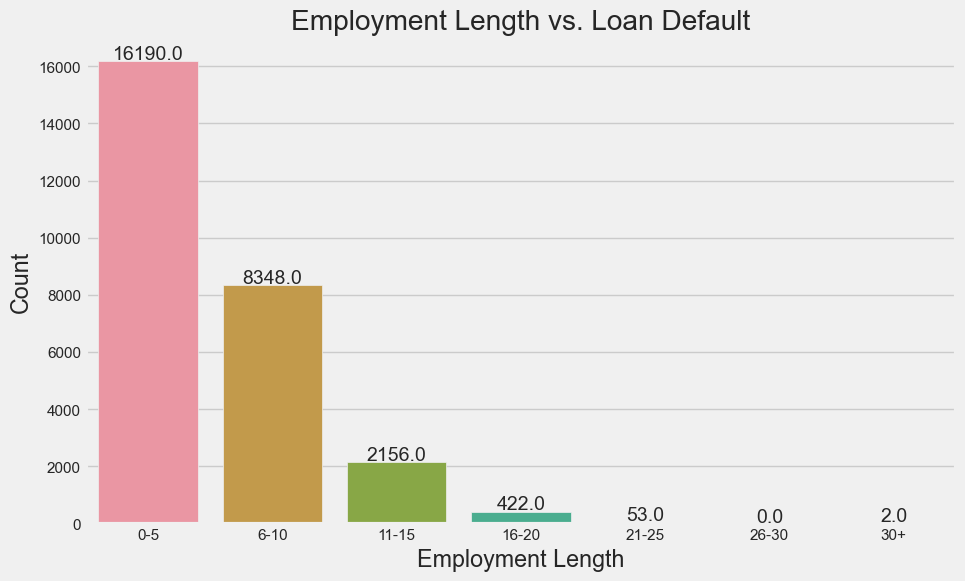

In [16]:
# 3. Employment Length vs. Loan Default
df['Employment_Length_Bracket'] = pd.cut(df['Emp_length'], bins=[0, 5, 10, 15, 20, 25, 30, np.inf], 
                                         labels=['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '30+'])
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Employment_Length_Bracket')

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Add the title and labels
plt.title('Employment Length vs. Loan Default')
plt.xlabel('Employment Length')
plt.ylabel('Count')

# Show the plot
plt.show()

#### Inference :
- It is observed that people who have less years of work experience majorly between **(0-5 years)** oftenly default on loans.Loan defaulters in that employment bracket are approximately **(52%)**.

### 4. Loan Amount vs. Loan Default

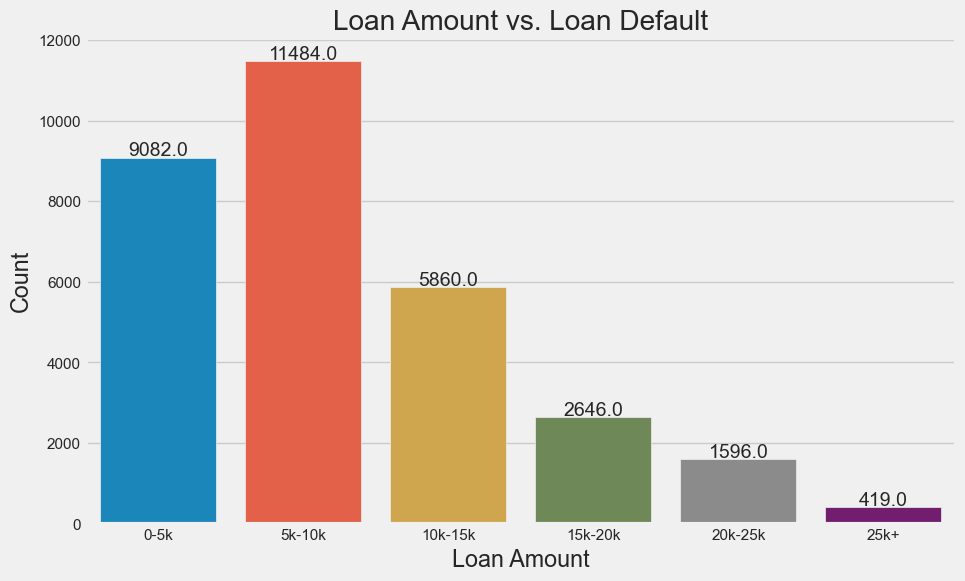

In [17]:
# 4. Loan Amount vs. Loan Default
df['Loan_Amount_Bracket'] = pd.cut(df['Amount'], bins=[0, 5000, 10000, 15000, 20000, 25000, np.inf], 
                                   labels=['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k+'])
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Loan_Amount_Bracket')

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Add the title and labels
plt.title('Loan Amount vs. Loan Default')
plt.xlabel('Loan Amount')
plt.ylabel('Count')

# Show the plot
plt.show()

#### Inference :
- **37%** of the loan defaulted are majorly loans for low amounts especially between **5k-10k**.

### 5. Interest Rate vs. Loan Default

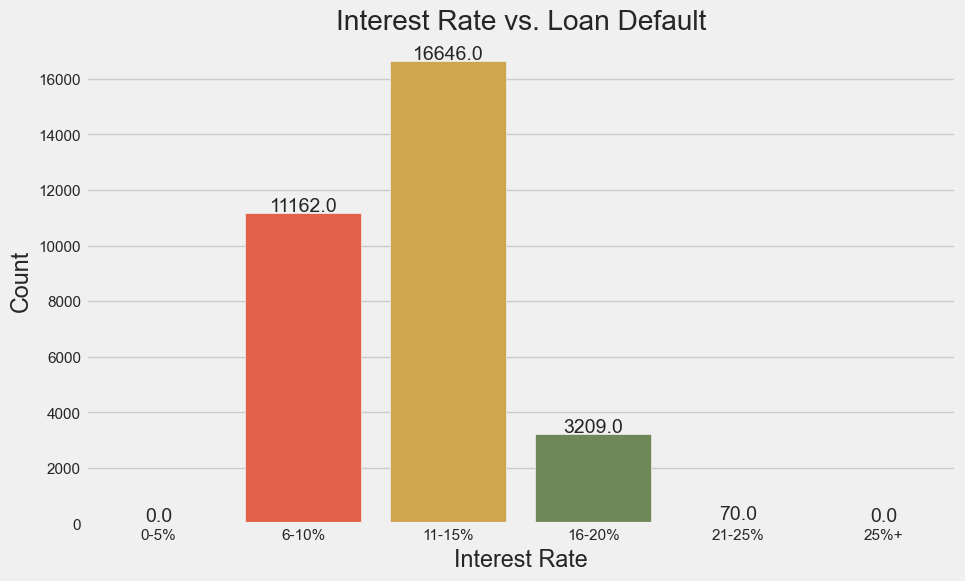

In [18]:
# 5. Interest Rate vs. Loan Default
df['Interest_Rate_Bracket'] = pd.cut(df['Rate'], bins=[0, 5, 10, 15, 20, 25, np.inf], 
                                     labels=['0-5%', '6-10%', '11-15%', '16-20%', '21-25%', '25%+'])
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Interest_Rate_Bracket')

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Add the title and labels
plt.title('Interest Rate vs. Loan Default')
plt.xlabel('Interest Rate')
plt.ylabel('Count')

# Show the plot
plt.show()

#### Inference :
- **(53%)** of the loan defaulted are loans lended at higher rates especially between **11-15%**

### 6. Credit Length vs. Loan Default

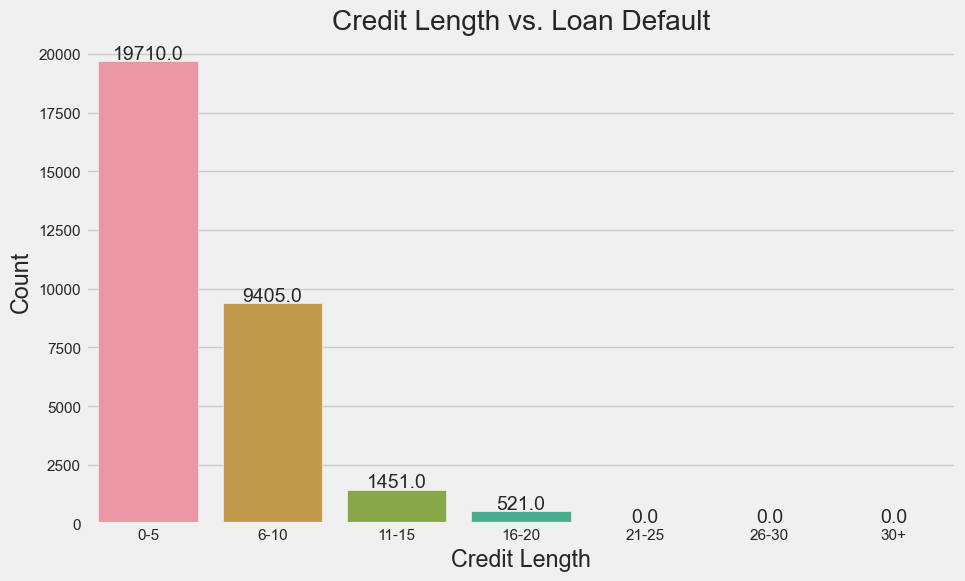

In [19]:
# 6. Credit Length vs. Loan Default
df['Credit_Length_Bracket'] = pd.cut(df['Cred_length'], bins=[0, 5, 10, 15, 20, 25, 30, np.inf], 
                                     labels=['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '30+'])
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Credit_Length_Bracket')

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Add the title and labels
plt.title('Credit Length vs. Loan Default')
plt.xlabel('Credit Length')
plt.ylabel('Count')

# Show the plot
plt.show()

#### Inference :
- **63%** of loans defaulted are usually lent for a short period of time majorly between **0-5 years.**

### 7. Home Ownership vs. Loan Default

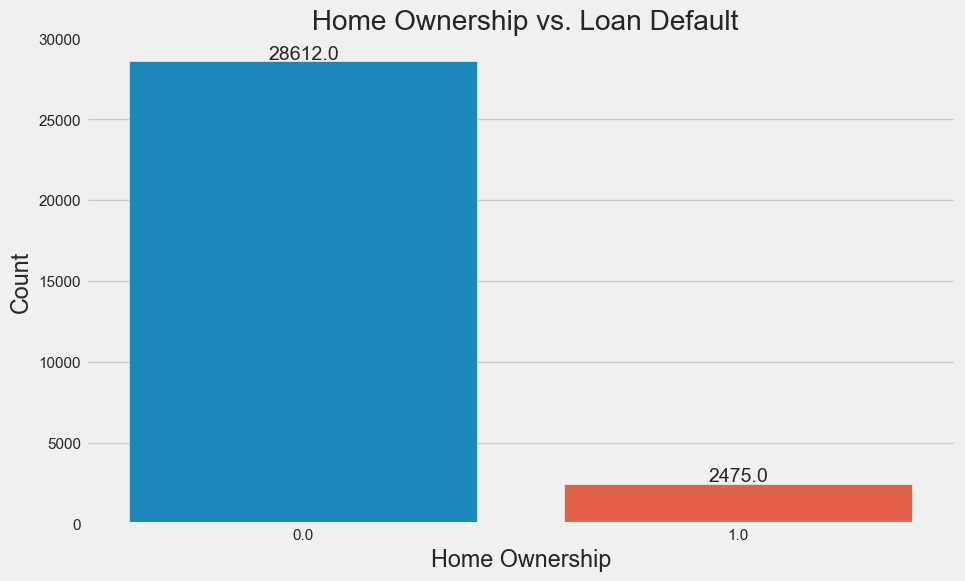

In [20]:
# 7. Home Ownership vs. Loan Default
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Home_OWN')

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Add the title and labels
plt.title(' Home Ownership vs. Loan Default')
plt.xlabel('Home Ownership')
plt.ylabel('Count')

# Show the plot
plt.show()

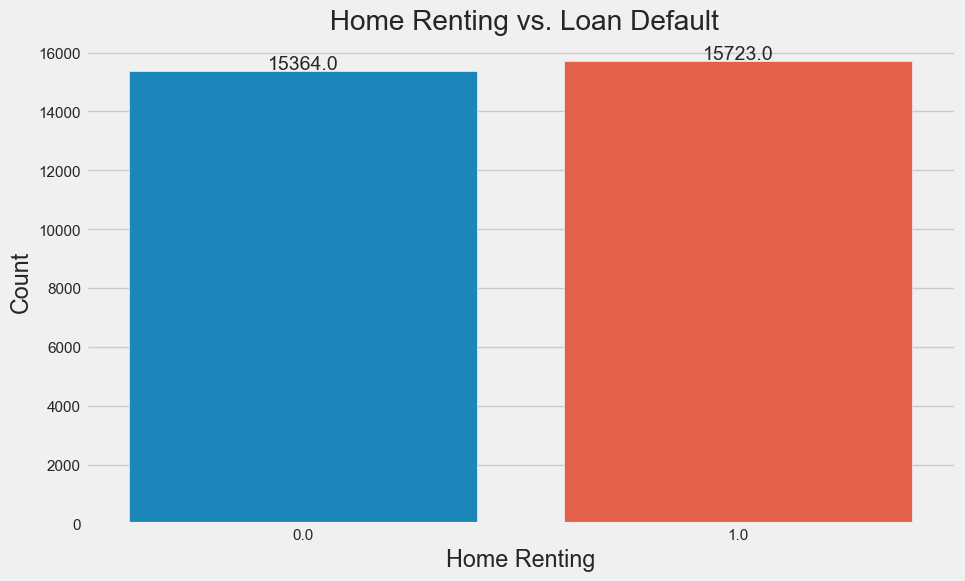

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Home_RENT')

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Add the title and labels
plt.title(' Home Renting vs. Loan Default')
plt.xlabel('Home Renting')
plt.ylabel('Count')

# Show the plot
plt.show()

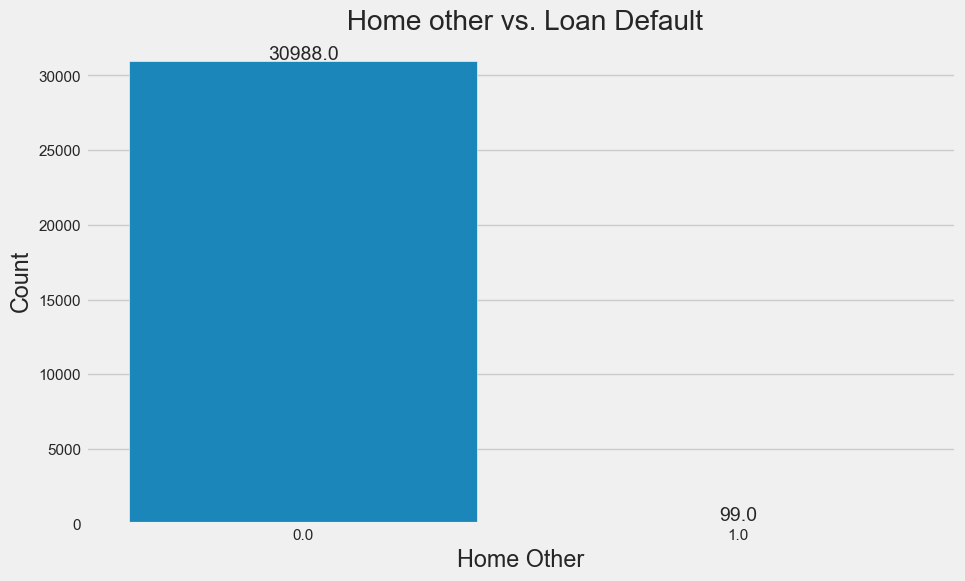

In [22]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Home_OTHER')

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Add the title and labels
plt.title(' Home other vs. Loan Default')
plt.xlabel('Home Other')
plt.ylabel('Count')

# Show the plot
plt.show()

#### Inference :
- It is seen that people who live in rental houses have a tendency to default loans compared to people who own homes

### 8. Loan Default by Loan Intent

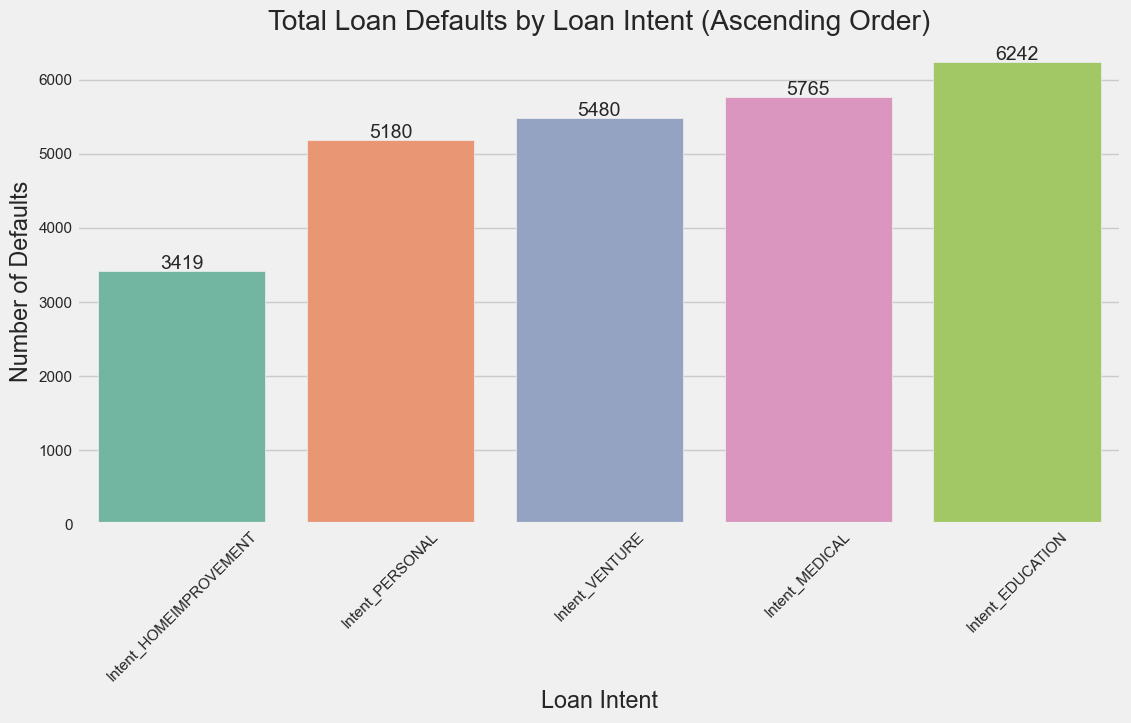

In [23]:
# Calculate the sum of defaults for each intent category
intent_columns = ['Intent_HOMEIMPROVEMENT', 'Intent_MEDICAL', 'Intent_PERSONAL', 'Intent_VENTURE', 'Intent_EDUCATION']
default_sums = df[intent_columns].sum()

# Sort the sums in ascending order
default_sums = default_sums.sort_values()

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=default_sums.index, y=default_sums.values, palette='Set2')

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set titles and labels
plt.title('Total Loan Defaults by Loan Intent (Ascending Order)')
plt.xlabel('Loan Intent')
plt.ylabel('Number of Defaults')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


#### Inference :
 - Loans disbursed as **education loans** seem to have the most defaults, with defaults being **20%** of the borrowers.

## 4.3 Multivariate Analysis

### Pairplot

<Figure size 1600x1000 with 0 Axes>

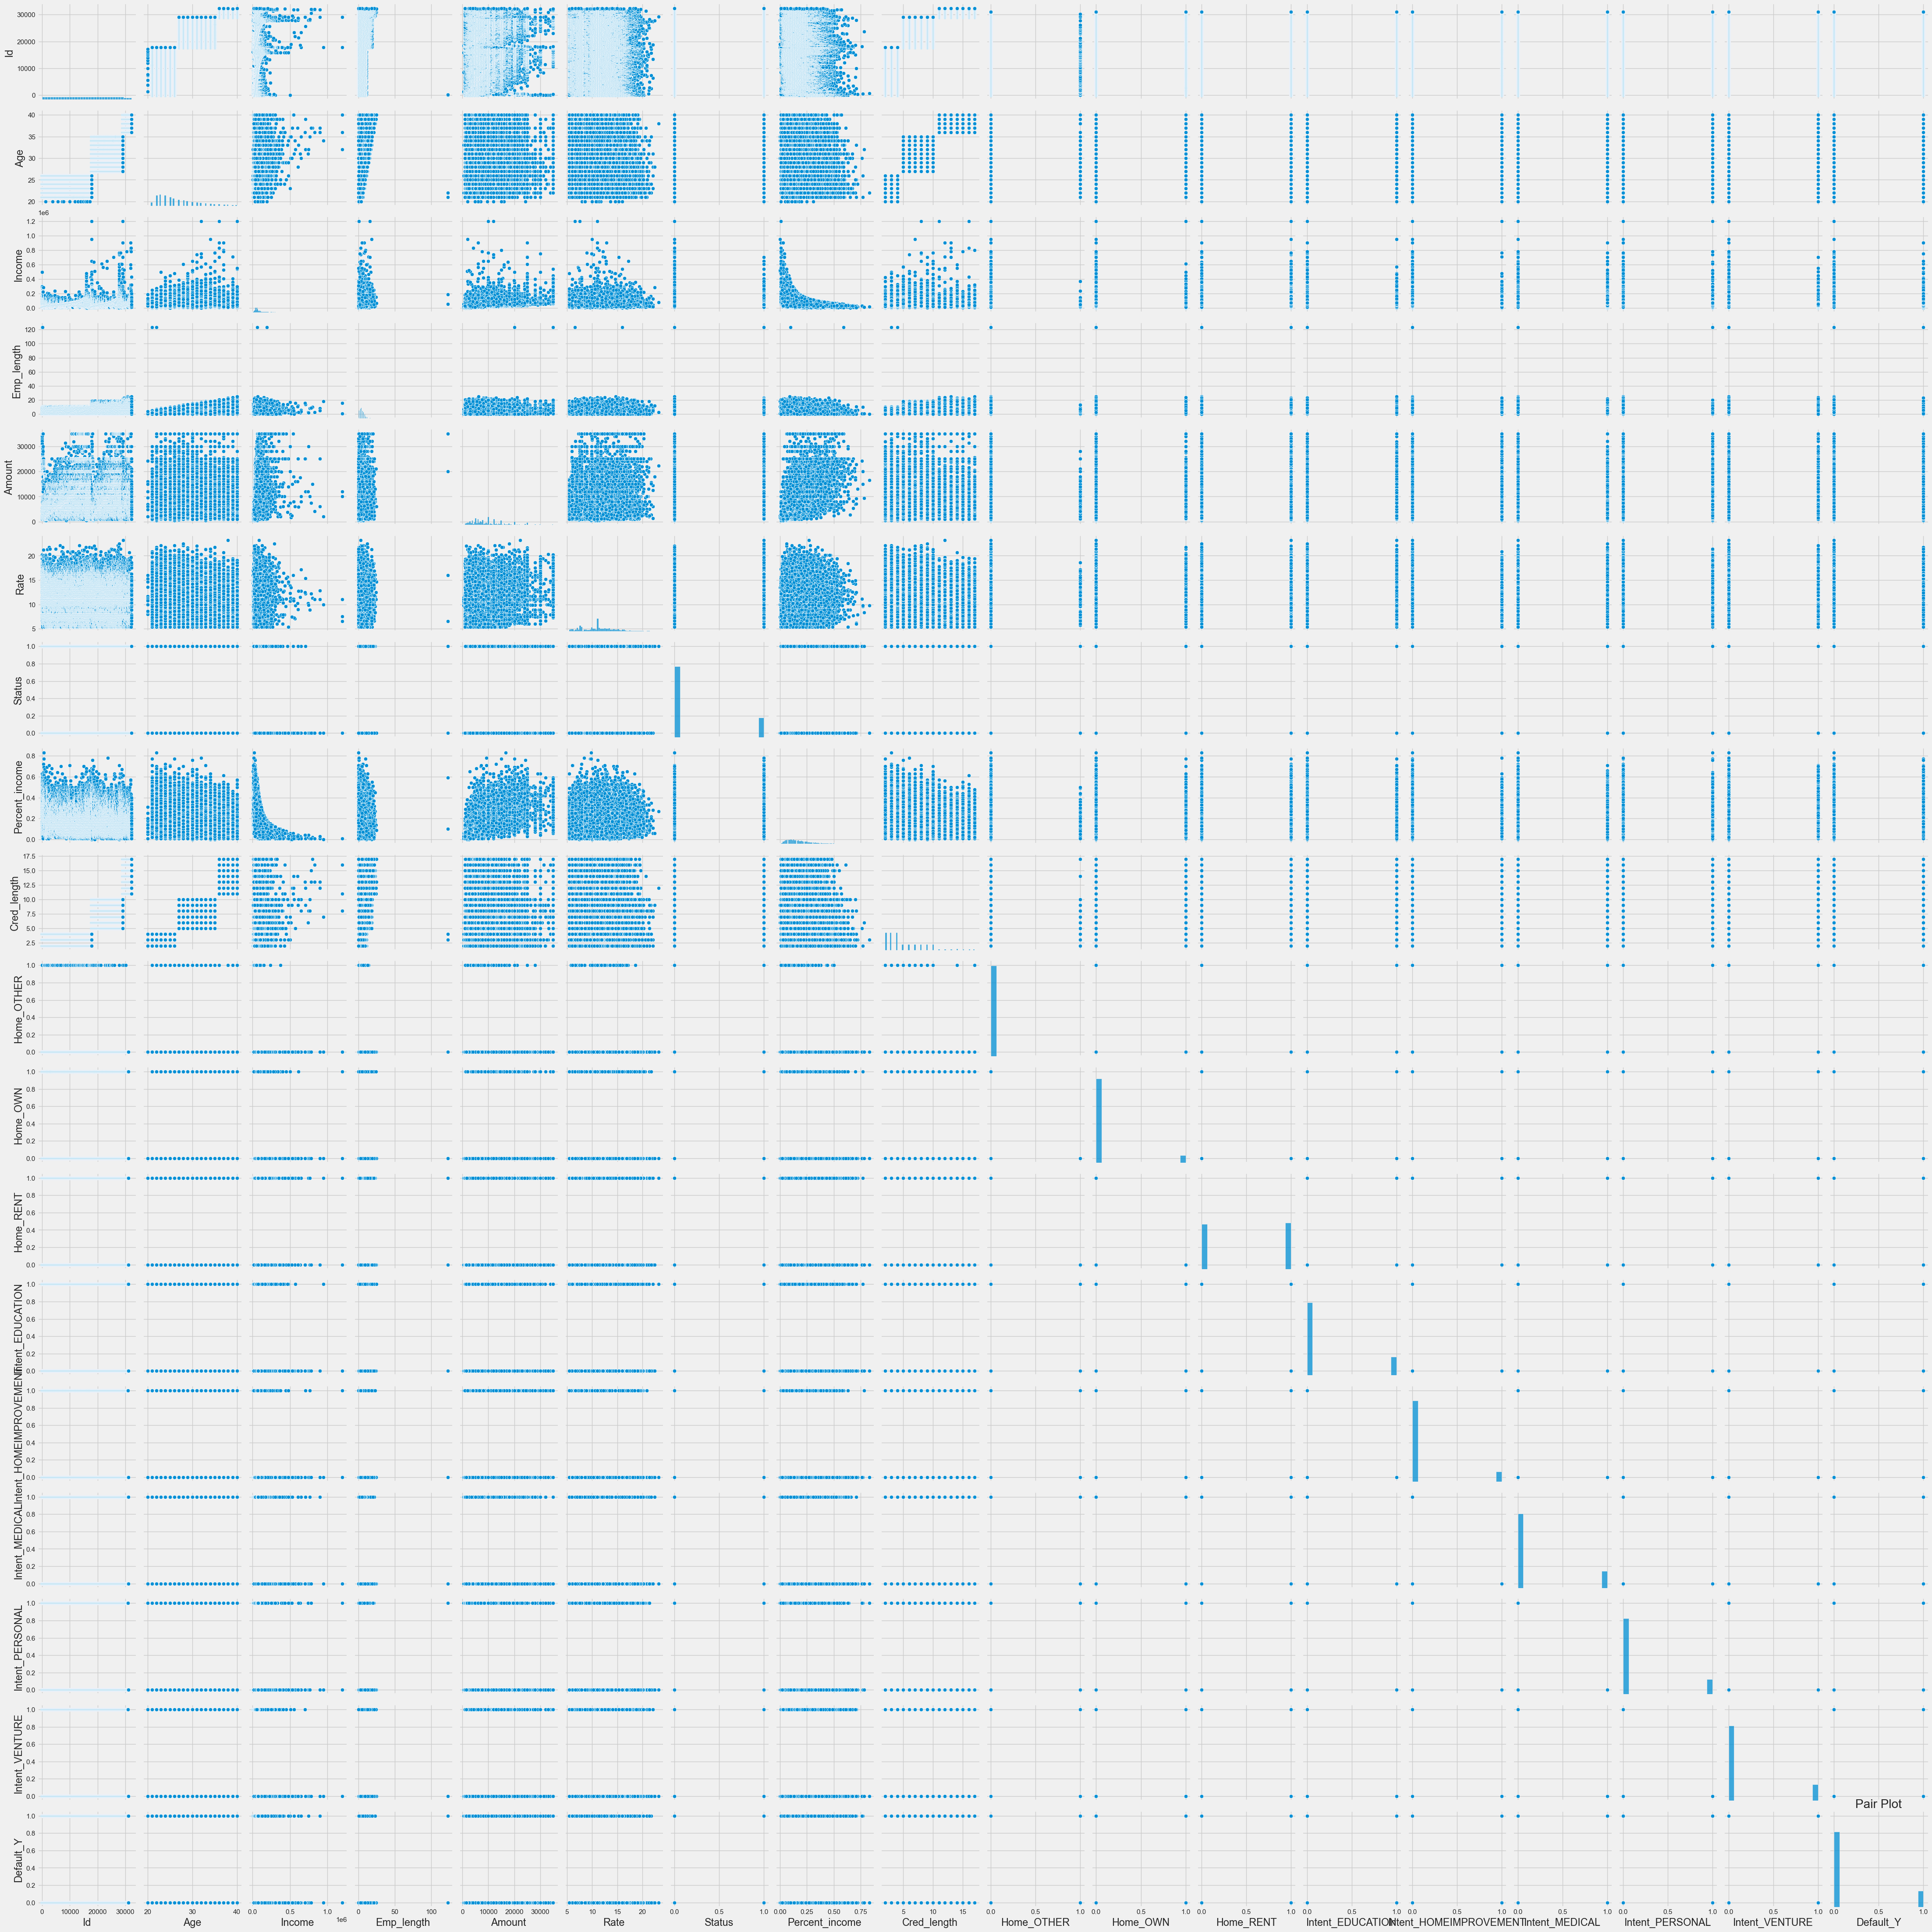

In [24]:
# Pair Plot for Multivariate Analysis
plt.figure(figsize=(16, 10))
sns.pairplot(df)
plt.title('Pair Plot')
plt.show()

## KEY FINDINGS : (Answers to our specific objectives)

After performing an exploratory data analysis on the data the following were the findings :
1. It is seen that **49%** of borrowers who default on loans are the young people majorly aged between **18-25.**
2. It is observed that the middle income(**Earning 40k-60k**), are prone to loan default.**(29%)** of the total loan borrowers.
3. It is observed that people who have less years of work experience majorly between **(0-5 years)** oftenly default on loans.Loan defaulters in that employment bracket are approximately **(52%)**.
4. **37%** of the loan defaulted are majorly loans for low amounts especially between **5k-10k**.
5. **(53%)** of the loan defaulted are loans lended at higher rates especially between **11-15%**.
6. **63%** of loans defaulted are usually lent for a short period of time majorly between **0-5 years.**
7. It is seen that people who live in rental houses have a tendency to default loans compared to people who own homes.
8. Loans disbursed as **education loans** seem to have the most defaults, with defaults being **20%** of the borrowers.

# 5. Feature Engineering

### 5.1 Encoding The New Categorical Columns

In [25]:
from sklearn.impute import SimpleImputer

# Define the imputer
imputer = SimpleImputer(strategy='mean')  

# Apply the imputer to the numerical columns
df[['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Percent_income', 'Cred_length']] = imputer.fit_transform(df[['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Percent_income', 'Cred_length']])# Encode the new categorical columns created during binning
df = pd.get_dummies(df, columns=['Age_Bracket', 'Income_Bracket', 'Employment_Length_Bracket', 'Loan_Amount_Bracket', 'Interest_Rate_Bracket', 'Credit_Length_Bracket'], drop_first=True)


In [26]:
df.isnull().sum()

Id                                 747
Age                                  0
Income                               0
Emp_length                           0
Amount                               0
Rate                                 0
Status                             747
Percent_income                       0
Cred_length                          0
Home_OTHER                         747
Home_OWN                           747
Home_RENT                          747
Intent_EDUCATION                   747
Intent_HOMEIMPROVEMENT             747
Intent_MEDICAL                     747
Intent_PERSONAL                    747
Intent_VENTURE                     747
Default_Y                          747
Age_Bracket_26-35                    0
Age_Bracket_36-45                    0
Age_Bracket_46-55                    0
Age_Bracket_56-65                    0
Age_Bracket_66+                      0
Income_Bracket_20k-40k               0
Income_Bracket_40k-60k               0
Income_Bracket_60k-80k   

In [29]:
# Drop rows with missing values
df = df.dropna()

### 5.2 Using Standard Scaler to transform data and splitting it into train and test set

In [30]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Splitting the data into features (X) and target (y)
X = df.drop(columns=['Default_Y', 'Id'])  # Dropping the target variable and unnecessary column.
y = df['Default_Y']  # Target variable

# Scaling the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 6. Model Training & Evaluation

## 6.1 Baseline Model : Logistic Regression

In [31]:
# Training a Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Making predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluating the Logistic Regression model
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Model Evaluation:
Accuracy: 0.8226763348714569
Confusion Matrix:
[[7488    1]
 [1613    0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90      7489
         1.0       0.00      0.00      0.00      1613

    accuracy                           0.82      9102
   macro avg       0.41      0.50      0.45      9102
weighted avg       0.68      0.82      0.74      9102

